#Searching for graphics based on the contents
  - The flowers dataset was used in the project
  - To generate image descriptor's vector DenseNet network was used.
  - Gao Huang first introduced the architecture on a CVPR conference in 2017  [Densely Connected Convolutional Networks](https://arxiv.org/abs/1608.06993).
  - The project is importing densenet from Keras API ([DenseNet121](https://keras.io/api/applications/densenet/)), that was trained on [ImageNet](https://www.image-net.org) dataset.

In [ ]:
import tensorflow_datasets as tfds
import tensorflow_hub as hub
import tensorflow as tf

In [ ]:
train_ds, info = tfds.load('tf_flowers', split='train', with_info=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.


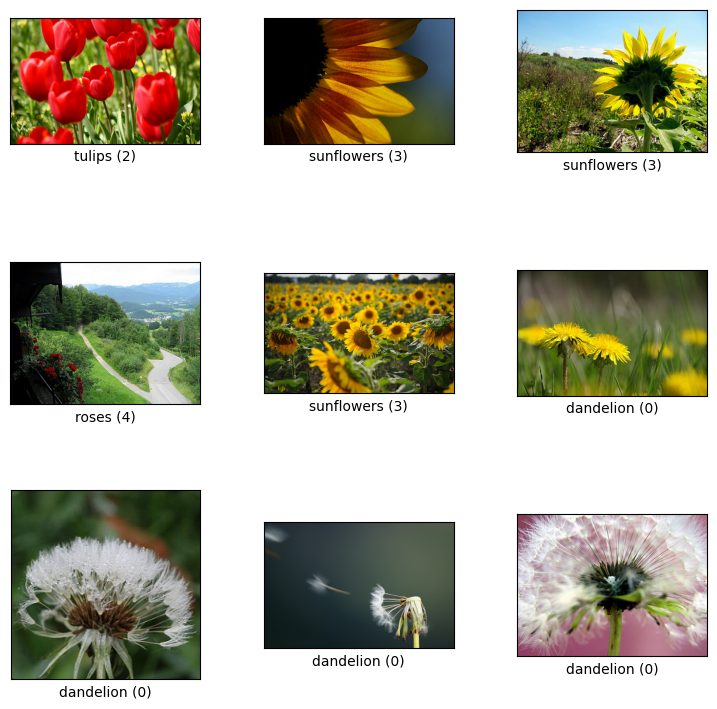

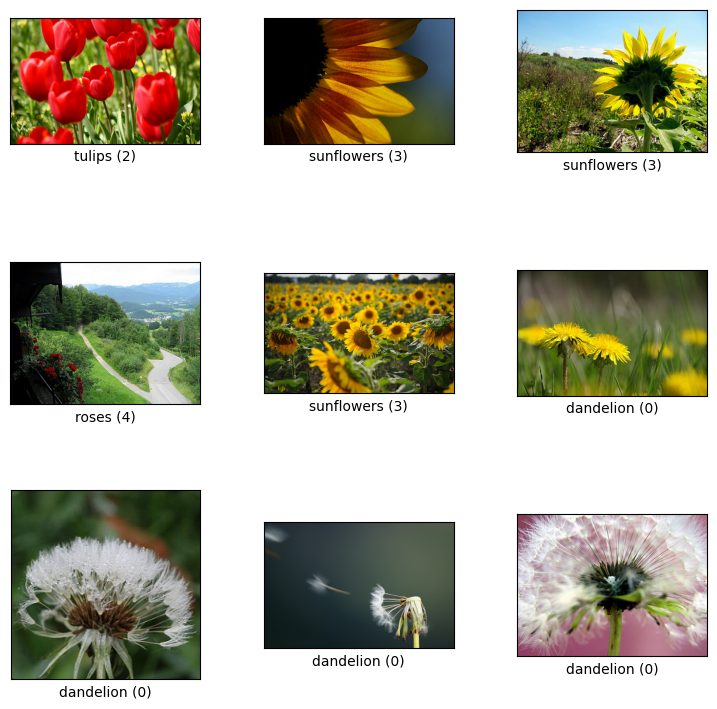

In [ ]:
tfds.show_examples(train_ds, ds_info=info)

In [ ]:
data = [x['image'] for x in train_ds]
labels = [x['label'] for x in train_ds]

In [ ]:
model = tf.keras.applications.DenseNet121(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
)

33188688/33188688 [==============================] - 0s 0us/step


In [ ]:
features_db = []
def forward_pass_for_single_img(x):
  x = tf.image.resize(x, (224, 224))
  x = tf.expand_dims(x,0)
  return x
for x in data[:1500]:
  features_db.append(forward_pass_for_single_img(x))

In [ ]:
def find_N_most_similar(N, img):
  features = forward_pass_for_single_img(img)
  return sorted(range(len(features_db)), key=lambda i: ((features_db[i]-features)**2).numpy().sum())[:N]
best_fits = find_N_most_similar(5, data[1556])

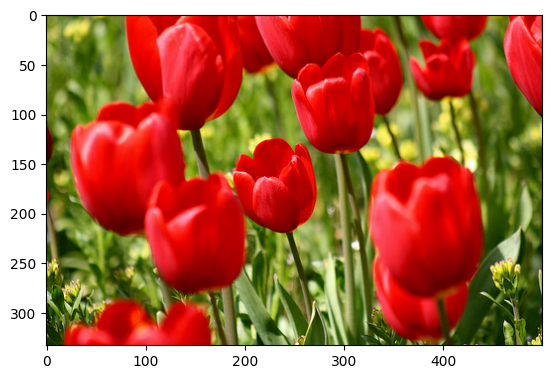

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(data[1556])

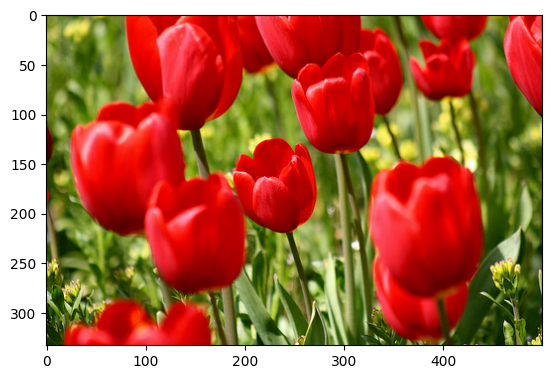

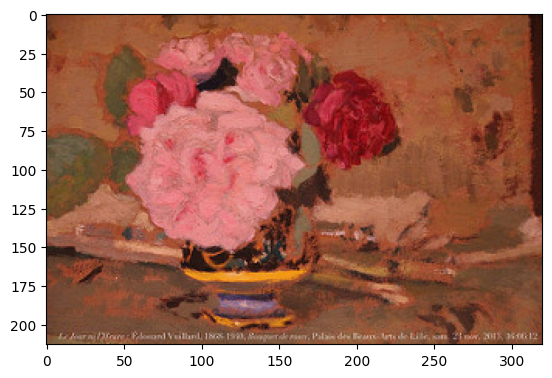

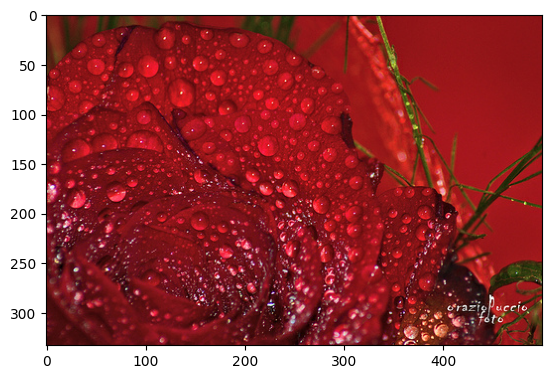

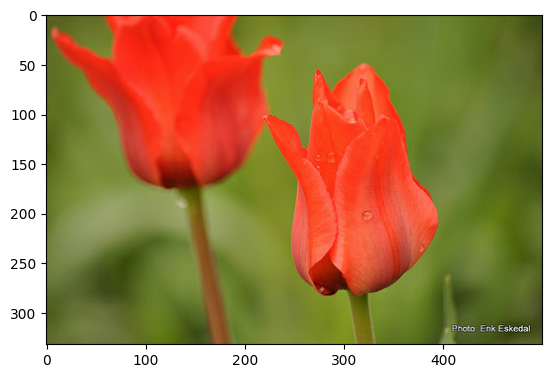

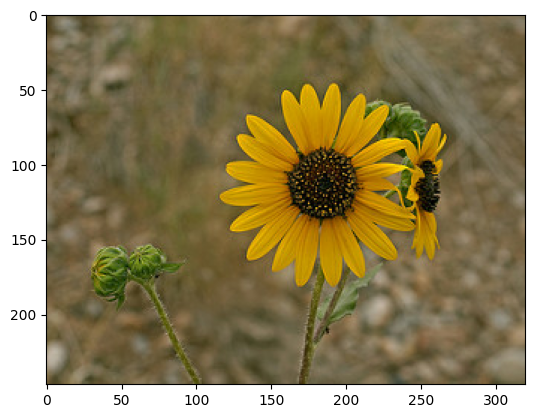

In [ ]:
for p in best_fits:
  plt.imshow(data[p])
  plt.show()